In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.055576,-0.262272,0.253509,0.244240,-0.113153,-0.168048,0.082914,0.069001,0.293133,...,-0.243573,-0.216159,-0.155475,-0.259163,0.360288,0.285031,0.234873,0.164340,0.249559,0.166046
bp,0.055576,1.000000,-0.183395,0.339631,0.242253,-0.255044,-0.091934,0.206433,0.186484,0.176553,...,-0.243858,-0.295079,-0.017602,-0.228461,0.360432,0.225079,0.258401,0.091920,0.125311,0.301652
sg,-0.262272,-0.183395,1.000000,-0.709152,-0.520535,0.529483,0.598284,-0.358462,-0.565888,-0.593849,...,0.653592,0.588587,0.351953,0.597060,-0.598798,-0.638845,-0.408850,-0.454942,-0.585219,-0.380400
al,0.253509,0.339631,-0.709152,1.000000,0.567167,-0.471361,-0.739031,0.452134,0.558961,0.503233,...,-0.793298,-0.715519,-0.298035,-0.659356,0.786164,0.679109,0.358325,0.508067,0.619784,0.581481
su,0.244240,0.242253,-0.520535,0.567167,1.000000,-0.267870,-0.377270,0.184191,0.431086,0.794405,...,-0.416803,-0.421250,-0.086607,-0.414791,0.662959,0.666242,0.500066,0.238367,0.479116,0.208864
rbc,-0.113153,-0.255044,0.529483,-0.471361,-0.267870,1.000000,0.408387,-0.108545,-0.383028,-0.433006,...,0.406116,0.408028,0.302706,0.346777,-0.354633,-0.478396,-0.232677,-0.399592,-0.295185,-0.228046
pc,-0.168048,-0.091934,0.598284,-0.739031,-0.377270,0.408387,1.000000,-0.537484,-0.498964,-0.362595,...,0.718246,0.631659,0.242476,0.648618,-0.631892,-0.657143,-0.320222,-0.478396,-0.655043,-0.548406
pcc,0.082914,0.206433,-0.358462,0.452134,0.184191,-0.108545,-0.537484,1.000000,0.374591,0.126073,...,-0.534540,-0.393369,-0.254138,-0.471054,0.402922,0.289414,0.306917,0.311162,0.294174,0.513778
ba,0.069001,0.186484,-0.565888,0.558961,0.431086,-0.383028,-0.498964,0.374591,1.000000,0.352196,...,-0.415486,-0.417640,-0.164349,-0.331158,0.369281,0.420181,0.284775,0.189982,0.456750,0.093459
bgr,0.293133,0.176553,-0.593849,0.503233,0.794405,-0.433006,-0.362595,0.126073,0.352196,1.000000,...,-0.428652,-0.437972,-0.210478,-0.418990,0.585541,0.672306,0.413252,0.300866,0.385221,0.180849


<AxesSubplot:>

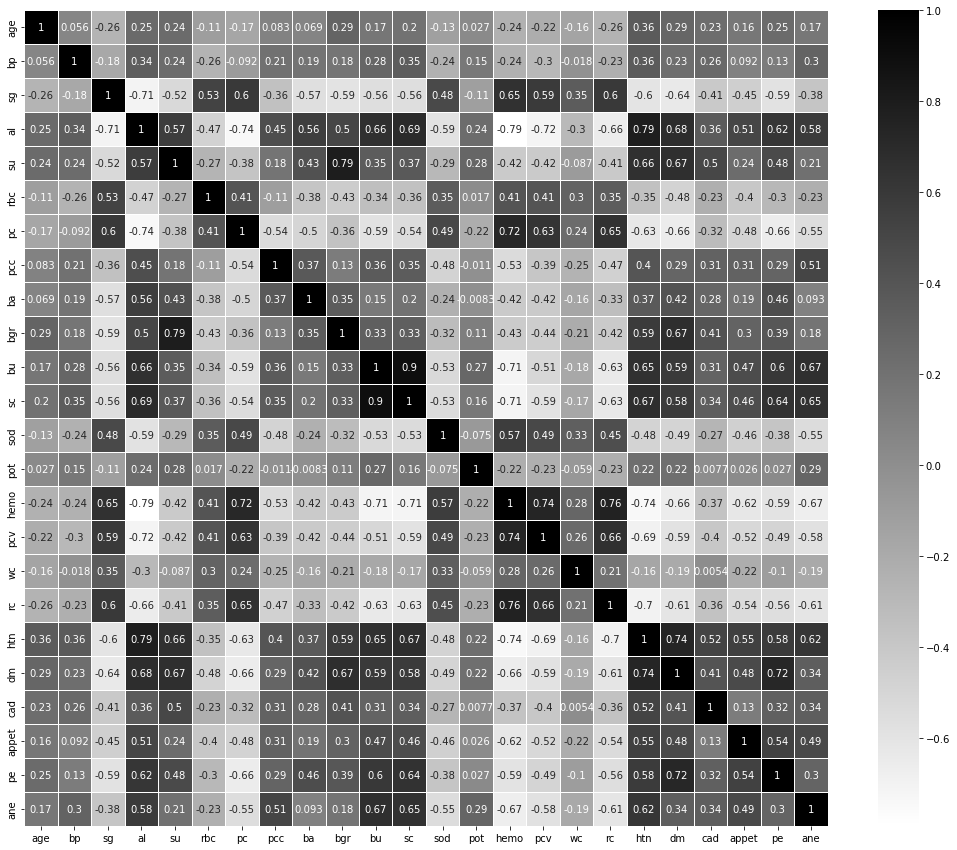

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'bgr', 'htn', 'rc', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'bgr', 'hemo', 'htn', 'rc', 'sc'}

In [13]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [14]:
different_ranking_methods = {}

In [15]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [16]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [17]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [19]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,al
1,htn,htn,htn,sc
2,hemo,hemo,hemo,pcv
3,pcv,pcv,sg,hemo
4,sg,sg,pcv,rc
5,pc,pc,pc,sg
6,dm,dm,dm,bu
7,rc,rc,rc,htn
8,sc,sc,sc,pc
9,bu,bu,bu,dm


In [20]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
print(selected_features)
print(corr_features)
print(todrop)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 140.94it/s]

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']
{'bgr', 'htn', 'sc', 'rc'}
{'sc', 'rc', 'bgr', 'hemo', 'htn'}


In [21]:
selected_features = [i for i in selected_features if i not in corr_features.union(todrop)]
selected_features

['al', 'sg', 'pcv', 'pc', 'dm', 'bu']

In [22]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: 1
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 6
Particle 2 - Fitness: 1.0, Number of Features: 8
Particle 3 - Fitness: 1.0, Number of Features: 9
Particle 4 - Fitness: 1.0, Number of Features: 8
Particle 5 - Fitness: 1.0, Number of Features: 9
Particle 6 - Fitness: 0.96875, Number of Features: 9
Particle 7 - Fitness: 0.96875, Number of Features: 9
Particle 8 - Fitness: 0.96875, Number of Features: 9
Particle 9 - Fitness: 0.96875, Number of Features: 11
Particle 10 - Fitness: 0.96875, Number of Features: 7
Particle 11 - Fitness: 0.96875, Number of Features: 10
Particle 12 - Fitness: 0.96875, Number of Features: 12
Particle 13 - Fitness: 0.96875, Number of Features: 10
Particle 14 - Fitness: 0.937


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 11
Particle 2 - Fitness: 1.0, Number of Features: 8
Particle 3 - Fitness: 1.0, Number of Features: 8
Particle 4 - Fitness: 0.96875, Number of Features: 12
Particle 5 - Fitness: 0.96875, Number of Features: 10
Particle 6 - Fitness: 0.96875, Number of Features: 9
Particle 7 - Fitness: 0.96875, Number of Features: 7
Particle 8 - Fitness: 0.96875, Number of Features: 8
Particle 9 - Fitness: 0.96875, Number of Features: 9
Particle 10 - Fitness: 0.9375, Number of Features: 8
Particle 11 - Fitness: 0.9375, Number of Features: 13
Particle 12 - Fitness: 0.9375, Number of Features: 12
Particle 13 - Fitness: 0.9375, Number of Features: 7
Particle 14 - Fitness: 0.9375, Number of Features: 7
Particle 15 - Fitness: 0.9375, Number of Features: 11
Particle 16 - Fitness: 0.9375, Number of Features: 6
Particle 17 - Fi


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 8
Particle 2 - Fitness: 1.0, Number of Features: 10
Particle 3 - Fitness: 1.0, Number of Features: 10
Particle 4 - Fitness: 0.96875, Number of Features: 16
Particle 5 - Fitness: 0.96875, Number of Features: 12
Particle 6 - Fitness: 0.96875, Number of Features: 7
Particle 7 - Fitness: 0.96875, Number of Features: 8
Particle 8 - Fitness: 0.96875, Number of Features: 10
Particle 9 - Fitness: 0.96875, Number of Features: 9
Particle 10 - Fitness: 0.9375, Number of Features: 5
Particle 11 - Fitness: 0.9375, Number of Features: 8
Particle 12 - Fitness: 0.9375, Number of Features: 7
Particle 13 - Fitness: 0.9375, Number of Features: 7
Particle 14 - Fitness: 0.9375, Number of Features: 8
Particle 15 - Fitness: 0.9375, Number of Features: 11
Particle 16 - Fitness: 0.9375, Number of Features: 8
Particle 17 - Fit


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 11
Particle 2 - Fitness: 1.0, Number of Features: 10
Particle 3 - Fitness: 0.96875, Number of Features: 9
Particle 4 - Fitness: 0.96875, Number of Features: 10
Particle 5 - Fitness: 0.96875, Number of Features: 10
Particle 6 - Fitness: 0.96875, Number of Features: 10
Particle 7 - Fitness: 0.96875, Number of Features: 9
Particle 8 - Fitness: 0.9375, Number of Features: 16
Particle 9 - Fitness: 0.9375, Number of Features: 6
Particle 10 - Fitness: 0.9375, Number of Features: 10
Particle 11 - Fitness: 0.9375, Number of Features: 11
Particle 12 - Fitness: 0.9375, Number of Features: 10
Particle 13 - Fitness: 0.9375, Number of Features: 15
Particle 14 - Fitness: 0.9375, Number of Features: 12
Particle 15 - Fitness: 0.9375, Number of Features: 8
Particle 16 - Fitness: 0.9375, Number of Features: 9
Particle 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 10
Particle 2 - Fitness: 1.0, Number of Features: 10
Particle 3 - Fitness: 1.0, Number of Features: 6
Particle 4 - Fitness: 0.96875, Number of Features: 9
Particle 5 - Fitness: 0.96875, Number of Features: 8
Particle 6 - Fitness: 0.96875, Number of Features: 12
Particle 7 - Fitness: 0.96875, Number of Features: 10
Particle 8 - Fitness: 0.96875, Number of Features: 12
Particle 9 - Fitness: 0.96875, Number of Features: 9
Particle 10 - Fitness: 0.9375, Number of Features: 11
Particle 11 - Fitness: 0.9375, Number of Features: 12
Particle 12 - Fitness: 0.9375, Number of Features: 10
Particle 13 - Fitness: 0.9375, Number of Features: 9
Particle 14 - Fitness: 0.9375, Number of Features: 6
Particle 15 - Fitness: 0.9375, Number of Features: 10
Particle 16 - Fitness: 0.9375, Number of Features: 7
Particle 17 -


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 11
Particle 2 - Fitness: 1.0, Number of Features: 11
Particle 3 - Fitness: 1.0, Number of Features: 8
Particle 4 - Fitness: 1.0, Number of Features: 9
Particle 5 - Fitness: 1.0, Number of Features: 10
Particle 6 - Fitness: 1.0, Number of Features: 5
Particle 7 - Fitness: 1.0, Number of Features: 8
Particle 8 - Fitness: 0.96875, Number of Features: 14
Particle 9 - Fitness: 0.96875, Number of Features: 8
Particle 10 - Fitness: 0.9375, Number of Features: 10
Particle 11 - Fitness: 0.9375, Number of Features: 8
Particle 12 - Fitness: 0.9375, Number of Features: 10
Particle 13 - Fitness: 0.9375, Number of Features: 11
Particle 14 - Fitness: 0.9375, Number of Features: 10
Particle 15 - Fitness: 0.9375, Number of Features: 13
Particle 16 - Fitness: 0.90625, Number of Features: 13
Particle 17 - Fitness: 0.90


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.96875
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.96875, Number of Features: 11
Particle 2 - Fitness: 0.96875, Number of Features: 14
Particle 3 - Fitness: 0.96875, Number of Features: 13
Particle 4 - Fitness: 0.96875, Number of Features: 11
Particle 5 - Fitness: 0.9375, Number of Features: 14
Particle 6 - Fitness: 0.9375, Number of Features: 5
Particle 7 - Fitness: 0.9375, Number of Features: 9
Particle 8 - Fitness: 0.9375, Number of Features: 12
Particle 9 - Fitness: 0.9375, Number of Features: 12
Particle 10 - Fitness: 0.9375, Number of Features: 10
Particle 11 - Fitness: 0.9375, Number of Features: 12
Particle 12 - Fitness: 0.9375, Number of Features: 13
Particle 13 - Fitness: 0.9375, Number of Features: 10
Particle 14 - Fitness: 0.9375, Number of Features: 7
Particle 15 - Fitness: 0.9375, Number of Features: 12
Particle 16 - Fitness: 0.9375, Number of Features: 7


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 9
Particle 2 - Fitness: 1.0, Number of Features: 9
Particle 3 - Fitness: 1.0, Number of Features: 7
Particle 4 - Fitness: 1.0, Number of Features: 11
Particle 5 - Fitness: 1.0, Number of Features: 10
Particle 6 - Fitness: 0.96875, Number of Features: 6
Particle 7 - Fitness: 0.96875, Number of Features: 10
Particle 8 - Fitness: 0.96875, Number of Features: 8
Particle 9 - Fitness: 0.96875, Number of Features: 10
Particle 10 - Fitness: 0.96875, Number of Features: 10
Particle 11 - Fitness: 0.9375, Number of Features: 9
Particle 12 - Fitness: 0.9375, Number of Features: 8
Particle 13 - Fitness: 0.9375, Number of Features: 8
Particle 14 - Fitness: 0.9375, Number of Features: 7
Particle 15 - Fitness: 0.9375, Number of Features: 9
Particle 16 - Fitness: 0.9375, Number of Features: 14
Particle 17 - Fitness: 0


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 8
Particle 2 - Fitness: 1.0, Number of Features: 12
Particle 3 - Fitness: 0.96875, Number of Features: 8
Particle 4 - Fitness: 0.96875, Number of Features: 10
Particle 5 - Fitness: 0.9375, Number of Features: 11
Particle 6 - Fitness: 0.9375, Number of Features: 12
Particle 7 - Fitness: 0.9375, Number of Features: 9
Particle 8 - Fitness: 0.9375, Number of Features: 13
Particle 9 - Fitness: 0.9375, Number of Features: 8
Particle 10 - Fitness: 0.9375, Number of Features: 12
Particle 11 - Fitness: 0.9375, Number of Features: 10
Particle 12 - Fitness: 0.9375, Number of Features: 11
Particle 13 - Fitness: 0.9375, Number of Features: 14
Particle 14 - Fitness: 0.9375, Number of Features: 11
Particle 15 - Fitness: 0.9375, Number of Features: 15
Particle 16 - Fitness: 0.90625, Number of Features: 11
Particle 17


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 9
Particle 2 - Fitness: 1.0, Number of Features: 10
Particle 3 - Fitness: 0.96875, Number of Features: 8
Particle 4 - Fitness: 0.96875, Number of Features: 12
Particle 5 - Fitness: 0.96875, Number of Features: 13
Particle 6 - Fitness: 0.96875, Number of Features: 11
Particle 7 - Fitness: 0.9375, Number of Features: 11
Particle 8 - Fitness: 0.9375, Number of Features: 9
Particle 9 - Fitness: 0.9375, Number of Features: 10
Particle 10 - Fitness: 0.9375, Number of Features: 13
Particle 11 - Fitness: 0.9375, Number of Features: 13
Particle 12 - Fitness: 0.9375, Number of Features: 10
Particle 13 - Fitness: 0.9375, Number of Features: 13
Particle 14 - Fitness: 0.9375, Number of Features: 6
Particle 15 - Fitness: 0.90625, Number of Features: 11
Particle 16 - Fitness: 0.90625, Number of Features: 17
Particle


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 11
Particle 2 - Fitness: 0.96875, Number of Features: 6
Particle 3 - Fitness: 0.96875, Number of Features: 11
Particle 4 - Fitness: 0.96875, Number of Features: 14
Particle 5 - Fitness: 0.9375, Number of Features: 10
Particle 6 - Fitness: 0.9375, Number of Features: 14
Particle 7 - Fitness: 0.9375, Number of Features: 8
Particle 8 - Fitness: 0.9375, Number of Features: 12
Particle 9 - Fitness: 0.9375, Number of Features: 7
Particle 10 - Fitness: 0.9375, Number of Features: 8
Particle 11 - Fitness: 0.9375, Number of Features: 11
Particle 12 - Fitness: 0.9375, Number of Features: 9
Particle 13 - Fitness: 0.90625, Number of Features: 11
Particle 14 - Fitness: 0.90625, Number of Features: 13
Particle 15 - Fitness: 0.90625, Number of Features: 16
Particle 16 - Fitness: 0.90625, Number of Features: 13
Part


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 11
Particle 2 - Fitness: 1.0, Number of Features: 8
Particle 3 - Fitness: 0.96875, Number of Features: 9
Particle 4 - Fitness: 0.96875, Number of Features: 13
Particle 5 - Fitness: 0.96875, Number of Features: 9
Particle 6 - Fitness: 0.96875, Number of Features: 11
Particle 7 - Fitness: 0.96875, Number of Features: 8
Particle 8 - Fitness: 0.9375, Number of Features: 10
Particle 9 - Fitness: 0.9375, Number of Features: 11
Particle 10 - Fitness: 0.9375, Number of Features: 16
Particle 11 - Fitness: 0.90625, Number of Features: 15
Particle 12 - Fitness: 0.90625, Number of Features: 9
Particle 13 - Fitness: 0.90625, Number of Features: 17
Particle 14 - Fitness: 0.90625, Number of Features: 14
Particle 15 - Fitness: 0.90625, Number of Features: 10
Particle 16 - Fitness: 0.90625, Number of Features: 16
Par


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 10
Particle 2 - Fitness: 1.0, Number of Features: 8
Particle 3 - Fitness: 1.0, Number of Features: 8
Particle 4 - Fitness: 0.96875, Number of Features: 13
Particle 5 - Fitness: 0.96875, Number of Features: 9
Particle 6 - Fitness: 0.96875, Number of Features: 12
Particle 7 - Fitness: 0.96875, Number of Features: 9
Particle 8 - Fitness: 0.96875, Number of Features: 10
Particle 9 - Fitness: 0.9375, Number of Features: 9
Particle 10 - Fitness: 0.9375, Number of Features: 11
Particle 11 - Fitness: 0.9375, Number of Features: 14
Particle 12 - Fitness: 0.9375, Number of Features: 12
Particle 13 - Fitness: 0.9375, Number of Features: 15
Particle 14 - Fitness: 0.9375, Number of Features: 12
Particle 15 - Fitness: 0.9375, Number of Features: 8
Particle 16 - Fitness: 0.9375, Number of Features: 7
Particle 17 - 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 14
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 14
Particle 2 - Fitness: 0.96875, Number of Features: 12
Particle 3 - Fitness: 0.96875, Number of Features: 9
Particle 4 - Fitness: 0.96875, Number of Features: 12
Particle 5 - Fitness: 0.9375, Number of Features: 14
Particle 6 - Fitness: 0.9375, Number of Features: 12
Particle 7 - Fitness: 0.9375, Number of Features: 9
Particle 8 - Fitness: 0.9375, Number of Features: 11
Particle 9 - Fitness: 0.9375, Number of Features: 13
Particle 10 - Fitness: 0.9375, Number of Features: 8
Particle 11 - Fitness: 0.9375, Number of Features: 13
Particle 12 - Fitness: 0.9375, Number of Features: 13
Particle 13 - Fitness: 0.9375, Number of Features: 13
Particle 14 - Fitness: 0.9375, Number of Features: 8
Particle 15 - Fitness: 0.9375, Number of Features: 17
Particle 16 - Fitness: 0.9375, Number of Features: 7
Particle


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 10
Particle 2 - Fitness: 0.96875, Number of Features: 15
Particle 3 - Fitness: 0.96875, Number of Features: 12
Particle 4 - Fitness: 0.9375, Number of Features: 8
Particle 5 - Fitness: 0.9375, Number of Features: 9
Particle 6 - Fitness: 0.9375, Number of Features: 10
Particle 7 - Fitness: 0.9375, Number of Features: 14
Particle 8 - Fitness: 0.9375, Number of Features: 11
Particle 9 - Fitness: 0.9375, Number of Features: 10
Particle 10 - Fitness: 0.9375, Number of Features: 8
Particle 11 - Fitness: 0.9375, Number of Features: 14
Particle 12 - Fitness: 0.9375, Number of Features: 8
Particle 13 - Fitness: 0.9375, Number of Features: 9
Particle 14 - Fitness: 0.90625, Number of Features: 12
Particle 15 - Fitness: 0.90625, Number of Features: 13
Particle 16 - Fitness: 0.90625, Number of Features: 14
Partic


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 13
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 13
Particle 2 - Fitness: 0.96875, Number of Features: 10
Particle 3 - Fitness: 0.96875, Number of Features: 12
Particle 4 - Fitness: 0.96875, Number of Features: 10
Particle 5 - Fitness: 0.96875, Number of Features: 8
Particle 6 - Fitness: 0.96875, Number of Features: 10
Particle 7 - Fitness: 0.96875, Number of Features: 8
Particle 8 - Fitness: 0.9375, Number of Features: 13
Particle 9 - Fitness: 0.9375, Number of Features: 11
Particle 10 - Fitness: 0.9375, Number of Features: 16
Particle 11 - Fitness: 0.9375, Number of Features: 14
Particle 12 - Fitness: 0.9375, Number of Features: 10
Particle 13 - Fitness: 0.9375, Number of Features: 11
Particle 14 - Fitness: 0.9375, Number of Features: 13
Particle 15 - Fitness: 0.9375, Number of Features: 15
Particle 16 - Fitness: 0.90625, Number of Features: 8
Pa


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 8
Particle 2 - Fitness: 1.0, Number of Features: 10
Particle 3 - Fitness: 1.0, Number of Features: 10
Particle 4 - Fitness: 0.96875, Number of Features: 9
Particle 5 - Fitness: 0.96875, Number of Features: 14
Particle 6 - Fitness: 0.96875, Number of Features: 10
Particle 7 - Fitness: 0.96875, Number of Features: 10
Particle 8 - Fitness: 0.96875, Number of Features: 12
Particle 9 - Fitness: 0.96875, Number of Features: 14
Particle 10 - Fitness: 0.9375, Number of Features: 12
Particle 11 - Fitness: 0.9375, Number of Features: 10
Particle 12 - Fitness: 0.9375, Number of Features: 8
Particle 13 - Fitness: 0.9375, Number of Features: 12
Particle 14 - Fitness: 0.9375, Number of Features: 10
Particle 15 - Fitness: 0.9375, Number of Features: 9
Particle 16 - Fitness: 0.9375, Number of Features: 11
Particle 17


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 8
Particle 2 - Fitness: 1.0, Number of Features: 8
Particle 3 - Fitness: 0.96875, Number of Features: 14
Particle 4 - Fitness: 0.96875, Number of Features: 12
Particle 5 - Fitness: 0.96875, Number of Features: 14
Particle 6 - Fitness: 0.96875, Number of Features: 11
Particle 7 - Fitness: 0.9375, Number of Features: 9
Particle 8 - Fitness: 0.9375, Number of Features: 12
Particle 9 - Fitness: 0.9375, Number of Features: 13
Particle 10 - Fitness: 0.9375, Number of Features: 11
Particle 11 - Fitness: 0.9375, Number of Features: 10
Particle 12 - Fitness: 0.9375, Number of Features: 7
Particle 13 - Fitness: 0.9375, Number of Features: 14
Particle 14 - Fitness: 0.9375, Number of Features: 12
Particle 15 - Fitness: 0.9375, Number of Features: 13
Particle 16 - Fitness: 0.90625, Number of Features: 10
Particle 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 10
Particle 2 - Fitness: 1.0, Number of Features: 12
Particle 3 - Fitness: 0.96875, Number of Features: 10
Particle 4 - Fitness: 0.96875, Number of Features: 16
Particle 5 - Fitness: 0.96875, Number of Features: 11
Particle 6 - Fitness: 0.96875, Number of Features: 8
Particle 7 - Fitness: 0.96875, Number of Features: 14
Particle 8 - Fitness: 0.9375, Number of Features: 13
Particle 9 - Fitness: 0.9375, Number of Features: 15
Particle 10 - Fitness: 0.9375, Number of Features: 12
Particle 11 - Fitness: 0.9375, Number of Features: 15
Particle 12 - Fitness: 0.9375, Number of Features: 7
Particle 13 - Fitness: 0.9375, Number of Features: 15
Particle 14 - Fitness: 0.9375, Number of Features: 9
Particle 15 - Fitness: 0.9375, Number of Features: 11
Particle 16 - Fitness: 0.9375, Number of Features: 17
Particl


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 10
Particle 2 - Fitness: 1.0, Number of Features: 5
Particle 3 - Fitness: 1.0, Number of Features: 13
Particle 4 - Fitness: 0.96875, Number of Features: 9
Particle 5 - Fitness: 0.96875, Number of Features: 18
Particle 6 - Fitness: 0.96875, Number of Features: 10
Particle 7 - Fitness: 0.96875, Number of Features: 10
Particle 8 - Fitness: 0.96875, Number of Features: 11
Particle 9 - Fitness: 0.9375, Number of Features: 15
Particle 10 - Fitness: 0.9375, Number of Features: 12
Particle 11 - Fitness: 0.9375, Number of Features: 14
Particle 12 - Fitness: 0.9375, Number of Features: 12
Particle 13 - Fitness: 0.9375, Number of Features: 16
Particle 14 - Fitness: 0.9375, Number of Features: 9
Particle 15 - Fitness: 0.9375, Number of Features: 13
Particle 16 - Fitness: 0.9375, Number of Features: 10
Particle 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 1.0
Number of Features: 12
----------------------------------------

Particle 1 - Fitness: 1.0, Number of Features: 12
Particle 2 - Fitness: 1.0, Number of Features: 15
Particle 3 - Fitness: 0.96875, Number of Features: 10
Particle 4 - Fitness: 0.96875, Number of Features: 10
Particle 5 - Fitness: 0.9375, Number of Features: 12
Particle 6 - Fitness: 0.9375, Number of Features: 10
Particle 7 - Fitness: 0.9375, Number of Features: 16
Particle 8 - Fitness: 0.9375, Number of Features: 10
Particle 9 - Fitness: 0.9375, Number of Features: 11
Particle 10 - Fitness: 0.9375, Number of Features: 11
Particle 11 - Fitness: 0.9375, Number of Features: 9
Particle 12 - Fitness: 0.9375, Number of Features: 14
Particle 13 - Fitness: 0.90625, Number of Features: 14
Particle 14 - Fitness: 0.90625, Number of Features: 13
Particle 15 - Fitness: 0.90625, Number of Features: 11
Particle 16 - Fitness: 0.90625, Number of Features: 11
Part

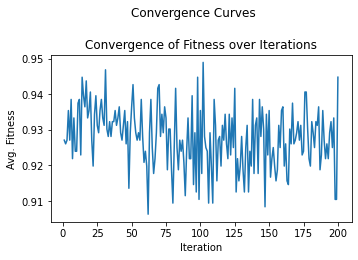

In [23]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=True)

In [24]:
solution.best_agent

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0.])

In [25]:
for i,v in enumerate(solution.best_agent):
    if v == 1:
        print(x.columns[i],end=', ')

pcc, hemo, pcv, wc, dm, pe, 

In [26]:
solution.final_fitness

array([1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9375 , 0.9375 ,
       0.9375 , 0.9375 , 0.9375 , 0.9375 , 0.9375 , 0.9375 , 0.9375 ,
       0.9375 , 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.875  ,
       0.875  , 0.84375])

In [66]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 24 features.
Fitting estimator with 14 features.
10 selected features


In [67]:
rfe_feature

['al', 'pc', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'dm']

In [68]:
#From MRMr and Pearson
selected_features

['al', 'sg', 'pcv', 'pc', 'dm', 'bu']

In [69]:
set(selected_features).union(set(rfe_feature))

{'al', 'bgr', 'bu', 'dm', 'hemo', 'pc', 'pcv', 'rc', 'sc', 'sg', 'sod'}